In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.metrics import accuracy_score
import tensorflow as tf
import keras
from keras.models import Model
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, merge
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.models import load_model

plt.rcParams['figure.figsize'] = (7,7)

C:\Users\Anku\.conda\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Anku\.conda\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Anku\.conda\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Anku\.conda\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:5

In [2]:
def split_train_test(data, test_ratio, state = 7):    
    shuffled_indices = np.random.RandomState(seed=state).permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return train_indices, test_indices 

In [3]:
def get_size(path, classes):
    size = 0
    for cl in classes:
        size += len(next(os.walk(path + cl))[2])
    ans = [size]
    one_path = path + classes[0] + '/' + next(os.walk(path + classes[0]))[2][0]
    one_im = cv2.imread(one_path)
    ans.extend(list(one_im.shape))
    return tuple(ans)

In [4]:
def img_data_reader(path, classes):
    if path[-1] != '/':
        path += '/'
    size = get_size(path, classes)
    X_cols = np.zeros(size).astype(np.uint8)
    Y_cols = np.zeros((size[0], len(classes))).astype(np.uint8)
    last_bound = 0
    for i in range(len(classes)):
        images = next(os.walk(path + classes[i]))[2]
        for j in range(len(images)):
            X_cols[last_bound + j] = cv2.imread(path + classes[i] + '/' + images[j])
            Y_cols[last_bound + j][i] = 1
        last_bound += len(images)
    return X_cols, Y_cols

In [5]:
#Классы:
#per - пересечение
#o - объединение
#pr - принадлежность
#pm - пустое множество 
#

classes = ['per', 'o', 'pr', 'pm']
path1 = 'C:\\Users\\Anku\\Desktop\\img\\data\\1'
path2 = 'C:\\Users\\Anku\\Desktop\\img\\data\\2'

In [6]:
X_1, Y_1 = img_data_reader(path1, classes)
X_2, Y_2 = img_data_reader(path2, classes)

X_train = X_1
Y_train = Y_1
X_test = X_2
Y_test = Y_2

X_full = np.concatenate([X_1, X_2])
Y_full = np.concatenate([Y_1, Y_2,])

In [7]:
train_i, test_i = split_train_test(X_full, 0.2)

X_train_2, Y_train_2 = X_full[train_i], Y_full[train_i]
X_test_2, Y_test_2 = X_full[test_i], Y_full[test_i]

In [8]:
epc = 100
batch = 50
k_size = 3 
hidden_size_1 = 256
hidden_size_2 = 128
hidden_size_3 = 64
input_size = 44 * 44
classes = 4

In [9]:
inputer_layer = Input(shape = X_train_2.shape[1:])
flat = Flatten(input_shape = X_train_2.shape[1:])(inputer_layer)

layer_1 = Dense(output_dim = hidden_size_2, input_shape=(4,), kernel_initializer = 'random_uniform', activation = 'relu')(flat)

layer_2 = Dense(output_dim = hidden_size_3, kernel_initializer = 'random_uniform', activation = 'relu')(layer_1)

layer_3 = Dense(output_dim = hidden_size_3, kernel_initializer = 'random_uniform', activation = 'relu')(layer_2)

outputer_layer = Dense(output_dim = 4, activation = 'softmax')(layer_2)


model = Model(input = inputer_layer, output = outputer_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']
)


C:\Users\Anku\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_shape=(4,), kernel_initializer="random_uniform", activation="relu", units=128)`
  after removing the cwd from sys.path.
C:\Users\Anku\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="random_uniform", activation="relu", units=64)`
  
C:\Users\Anku\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="random_uniform", activation="relu", units=64)`
  
C:\Users\Anku\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=4)`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Anku\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Upd

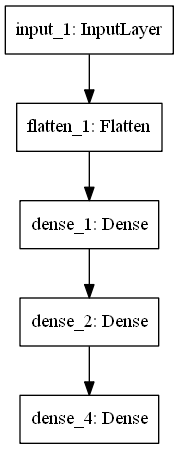

In [10]:
from keras.utils import plot_model
plot_model(model,'MultiLayerNetworkStructure.png')

In [11]:
model.save("clear.h5")


Train on 400 samples, validate on 400 samples
Epoch 1/100
400/400 [==============================] - 0s 727us/step - loss: 363.0367 - accuracy: 0.2275 - val_loss: 287.8907 - val_accuracy: 0.2500
Epoch 2/100
400/400 [==============================] - 0s 292us/step - loss: 263.8246 - accuracy: 0.2600 - val_loss: 219.6749 - val_accuracy: 0.2500
Epoch 3/100
400/400 [==============================] - 0s 280us/step - loss: 157.6740 - accuracy: 0.2425 - val_loss: 90.8950 - val_accuracy: 0.4125
Epoch 4/100
400/400 [==============================] - 0s 285us/step - loss: 73.3240 - accuracy: 0.2800 - val_loss: 83.9929 - val_accuracy: 0.2500
Epoch 5/100
400/400 [==============================] - 0s 275us/step - loss: 60.4202 - accuracy: 0.2675 - val_loss: 27.3131 - val_accuracy: 0.2500
Epoch 6/100
400/400 [==============================] - 0s 282us/step - loss: 23.3689 - accuracy: 0.2450 - val_loss: 23.8132 - val_accuracy: 0.2500
Epoch 7/100
400/400 [==============================] - 0s 280us/st

400/400 [==============================] - 0s 265us/step - loss: 0.6431 - accuracy: 0.8225 - val_loss: 0.3203 - val_accuracy: 0.8800
Epoch 56/100
400/400 [==============================] - 0s 265us/step - loss: 0.2822 - accuracy: 0.8900 - val_loss: 1.1266 - val_accuracy: 0.7875
Epoch 57/100
400/400 [==============================] - 0s 268us/step - loss: 0.3030 - accuracy: 0.9075 - val_loss: 0.7281 - val_accuracy: 0.7725
Epoch 58/100
400/400 [==============================] - 0s 260us/step - loss: 0.2449 - accuracy: 0.9100 - val_loss: 1.5074 - val_accuracy: 0.6125
Epoch 59/100
400/400 [==============================] - 0s 265us/step - loss: 0.4859 - accuracy: 0.8475 - val_loss: 4.3287 - val_accuracy: 0.3075
Epoch 60/100
400/400 [==============================] - 0s 258us/step - loss: 0.3407 - accuracy: 0.9050 - val_loss: 0.6753 - val_accuracy: 0.8000
Epoch 61/100
400/400 [==============================] - 0s 253us/step - loss: 0.2020 - accuracy: 0.9325 - val_loss: 0.3892 - val_accuracy

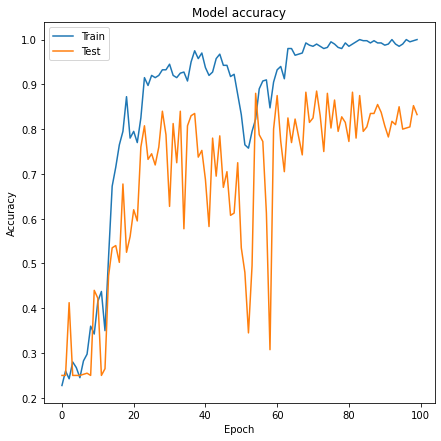

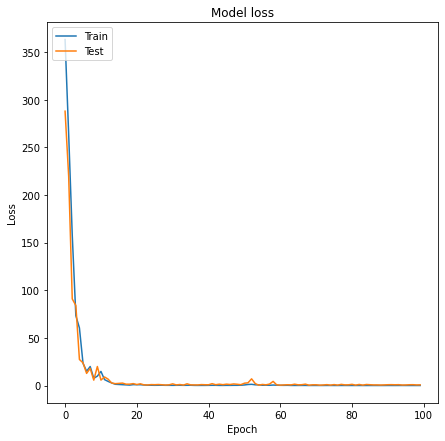

In [12]:
#Обучение на первом наборе (50/50)
hist = model.fit(X_train, Y_train, batch_size = batch, epochs = epc, validation_data=(X_test, Y_test))

test_acc = model.evaluate(X_train,  Y_train, verbose = 2)
print("\nТочность на тренировочных(обучающих) данных: %.3f" % test_acc[1])
print("%s: %.3f" % (model.metrics_names[0], test_acc[0])) # loss (потери)
test_acc = model.evaluate(X_test,  Y_test, verbose = 2)
print("\nТочность на проверочных(тестовых) данных: %.3f" % test_acc[1])
print("%s: %.3f" % (model.metrics_names[0], test_acc[0])) # loss (потери)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('211.png')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('212.png')
plt.show()

In [13]:
model = load_model("clear.h5")

Train on 640 samples, validate on 160 samples
Epoch 1/100
640/640 [==============================] - 0s 494us/step - loss: 304.7482 - accuracy: 0.2562 - val_loss: 179.6153 - val_accuracy: 0.2250
Epoch 2/100
640/640 [==============================] - 0s 259us/step - loss: 102.4920 - accuracy: 0.2812 - val_loss: 75.7725 - val_accuracy: 0.2625
Epoch 3/100
640/640 [==============================] - 0s 267us/step - loss: 62.7378 - accuracy: 0.2891 - val_loss: 17.8168 - val_accuracy: 0.4750
Epoch 4/100
640/640 [==============================] - 0s 295us/step - loss: 33.9557 - accuracy: 0.3438 - val_loss: 34.0722 - val_accuracy: 0.2375
Epoch 5/100
640/640 [==============================] - 0s 297us/step - loss: 33.8518 - accuracy: 0.3406 - val_loss: 36.4152 - val_accuracy: 0.2625
Epoch 6/100
640/640 [==============================] - 0s 294us/step - loss: 29.8926 - accuracy: 0.4031 - val_loss: 31.4557 - val_accuracy: 0.3375
Epoch 7/100
640/640 [==============================] - 0s 255us/step 

Epoch 57/100
640/640 [==============================] - 0s 236us/step - loss: 0.2899 - accuracy: 0.9391 - val_loss: 0.2679 - val_accuracy: 0.9312
Epoch 58/100
640/640 [==============================] - 0s 234us/step - loss: 0.2237 - accuracy: 0.9484 - val_loss: 1.0801 - val_accuracy: 0.8125
Epoch 59/100
640/640 [==============================] - 0s 236us/step - loss: 0.1554 - accuracy: 0.9500 - val_loss: 0.9648 - val_accuracy: 0.8125
Epoch 60/100
640/640 [==============================] - 0s 266us/step - loss: 0.2224 - accuracy: 0.9375 - val_loss: 0.1211 - val_accuracy: 0.9750
Epoch 61/100
640/640 [==============================] - 0s 283us/step - loss: 0.1617 - accuracy: 0.9563 - val_loss: 0.0630 - val_accuracy: 0.9875
Epoch 62/100
640/640 [==============================] - 0s 259us/step - loss: 0.1060 - accuracy: 0.9750 - val_loss: 0.3037 - val_accuracy: 0.9375
Epoch 63/100
640/640 [==============================] - 0s 248us/step - loss: 0.1596 - accuracy: 0.9641 - val_loss: 0.1104 -

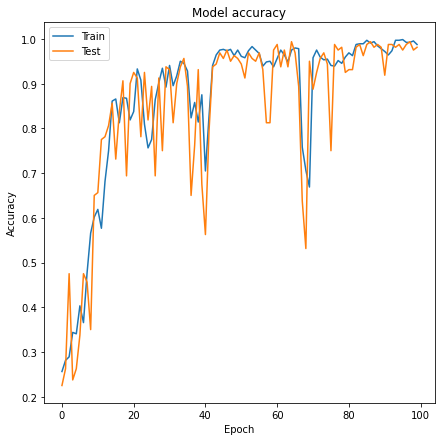

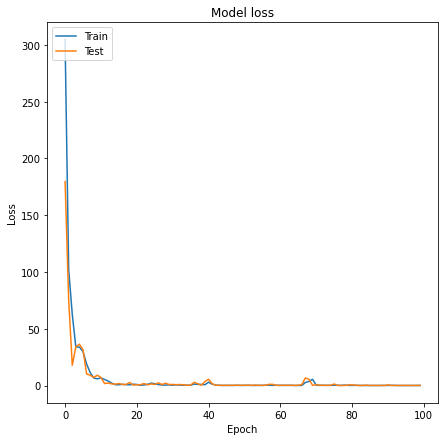

In [14]:
#Обучение на втором наборе (80/20)

hist = model.fit(X_train_2, Y_train_2, batch_size = batch, epochs = epc, validation_data=(X_test_2, Y_test_2))

test_acc = model.evaluate(X_train_2,  Y_train_2, verbose = 2)
print("\nТочность на тренировочных(обучающих) данных: %.3f" % test_acc[1])
print("%s: %.3f" % (model.metrics_names[0], test_acc[0])) # loss (потери)
test_acc = model.evaluate(X_test_2,  Y_test_2, verbose = 2)
print("\nТочность на проверочных(тестовых) данных: %.3f" % test_acc[1])
print("%s: %.3f" % (model.metrics_names[0], test_acc[0])) # loss (потери)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('221.png')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('222.png')
plt.show()